# TASK #1 Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

# Author : Karunamoorthy S

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull == True

False

# Visualization
### Hours Vs Percentage of Scores

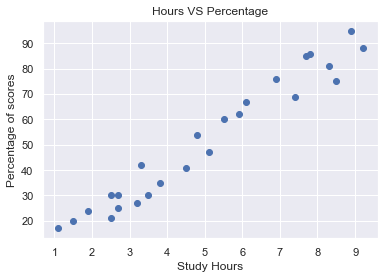

In [7]:
sns.set_theme()
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Study Hours')
plt.ylabel('Percentage of scores')
plt.title('Hours VS Percentage')
plt.show()

# Train-Test Split

In [8]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=0)

## Training the Simple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print('----Trained----')

----Trained----


#### ploting the regression line

In [11]:
line = regressor.coef_*X+regressor.intercept_

#### Plotting for the test data

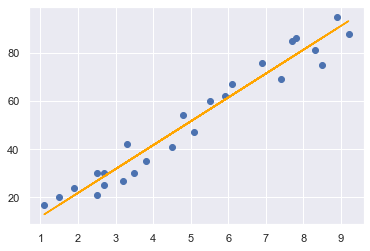

In [12]:
plt.scatter(X,y)
plt.plot(X, line, color='orange')

#### Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### Visualising the Training  and test set results

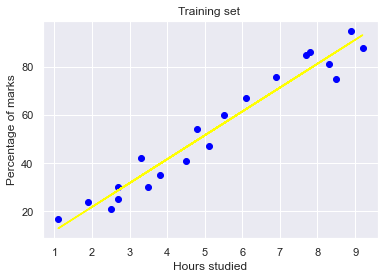

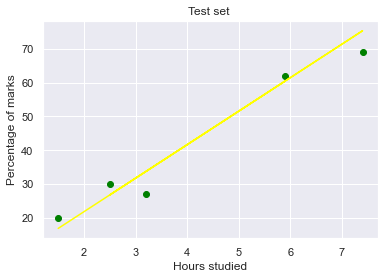

In [14]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='yellow')
plt.title('Training set ')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,regressor.predict(X_test),color='yellow')
plt.title('Test set ')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

#### Comparing the actual values with the predicted ones.

In [15]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### predicting the score 

In [16]:
df = np.array(9.25)
df = df.reshape(-1,1)
pred = regressor.predict(df)
print("If the student studies for 9.25 hours/day,\nthe score is {}.".format(pred))

If the student studies for 9.25 hours/day,
the score is [93.69173249].


# Error Metrics

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
The R-Square of the model is:  0.9454906892105354


# conclusion

### We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 93.69

# Thank you